[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
Round 0 0x67fe95d3188bbeb4 0x0519283201091364 0x5029387763948871 0x0000000000000000 0x1248248148128124
Round 1 0xaf1686cdd82390b3 0xa325064021226c80 0x5029387763948871 0x0000000000000000 0x2481481281241248
Round 2 0xb467129c6ad40268 0xa325064021226c80 0x05270eec72910e2a 0x0000000000000000 0x4812812412482481
Round 3 0xce607e821a1e1ab0 0x64a0c804244d9014 0x05270eec72910e2a 0x0000000000000000 0x8124124824814812
Round 4 0x63f532a083cf1578 0x64a0c804244d9014 0xa4e1dd8e5221c540 0x0000000000000000 0x8124124824814812
Round 5 0x0170c9772a88199d 0x9419008489b2028c 0xa4e1dd8e5221c540 0x0000000000000000 0x1248248148128124
Round 6 0x004da94ebede2ae1 0x9419008489b2028c 0x9c3bb1ca4438a814 0x0000000000000000 0x2481481281241248
Round 7 0x1725c8ade4cce614 0x8320109136405192 0x9c3bb1ca4438a814 0x0000000000000000 0x

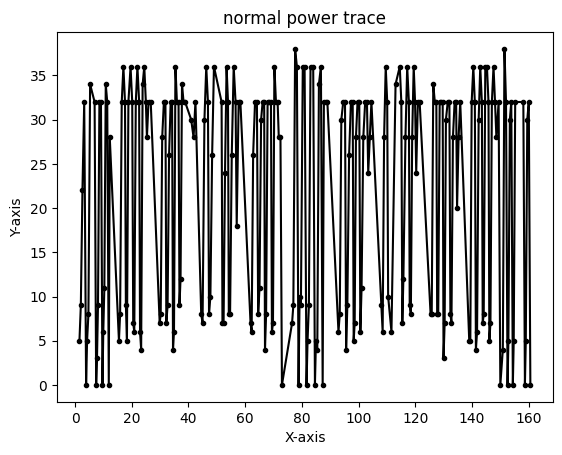

In [ ]:
def SR(inp):
	res = []
	for i in range(64):
		shft = (i // 4) % 4
		res.append(inp[(i - 16*shft) % 64])
	return res

def Mx16bit(b):
	c = [0 for i in range(16)]
	c[0] = (b[0] + b[12] + b[15] + b[3] + b[7] + b[8])%2
	c[1] = (b[0] + b[1] + b[12] + b[13] + b[4] + b[9])%2
	c[2] = (b[1] + b[10]+ b[13]+ b[14]+ b[2]+ b[5])%2
	c[3] = (b[11]+ b[14]+ b[2]+ b[6]+ b[7])%2
	c[4] = (b[0] + b[1]+ b[11]+ b[15]+ b[5])%2
	c[5] = (b[1]+ b[12]+ b[2]+ b[6]+ b[8])%2
	c[6] = (b[0] + b[13]+ b[2]+ b[3]+ b[4]+ b[7]+ b[9])%2
	c[7] = (b[0] + b[10]+ b[11]+ b[14]+ b[15]+ b[3]+ b[4])%2
	c[8] = (b[1]+ b[11]+ b[15]+ b[4]+ b[5]+ b[8])%2
	c[9] = (b[12]+ b[2]+ b[5]+ b[6]+ b[8]+ b[9])%2
	c[10] = (b[0] + b[10]+ b[13]+ b[3]+ b[4]+ b[6]+ b[7]+ b[9])%2
	c[11] = (b[0] + b[10]+ b[14]+ b[15]+ b[4]+ b[7])%2
	c[12] = (b[11]+ b[12]+ b[3]+ b[7]+ b[8])%2
	c[13] = (b[0] + b[13]+ b[4]+ b[8]+ b[9])%2
	c[14] = (b[1]+ b[10]+ b[14]+ b[5]+ b[9])%2
	c[15] = (b[10]+ b[15]+ b[2]+ b[3]+ b[6]+ b[7])%2
	return c

def Sbox16bit(inp):
	sb = [1,3,0,2,7,14,4,13,9,10,12,6,15,5,8,11]
	#sb is the mapping
	res = []
	for i in range(0,16,4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		v = sb[v]
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def in_bin(inp): # 0x45ba into [4,5,11,10]
	res = []
	for i in range(2,len(inp)):
		v = (int(inp[i],16))
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def lcs(inp):
	res = []
	key = inp[0]
	for i in range(1,len(inp)):
		res.append(inp[i])
	res.append(key)
	return res

def in_hex(inp):
	res = "0x"
	for i in range(0,len(inp),4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		res = res + hex(v)[2:]
	return res

import time
start_time = time.time() #start of the execution

#64-bit input registers
X =   in_bin("0x5353414d414e5441")
K0 =  in_bin("0x0519283201091364")
K1 =  in_bin("0x5029387763948871")
print(X)
############ Sbox Mappings #########################
sb = [1,3,0,2,7,14,4,13,9,10,12,6,15,5,8,11]
############ ROUND CONSTANTS #######################
RC0 = in_bin("0x0000000000000000")#don't edit
RC1 = in_bin("0x1248248148128124")#don't edit
K = [K0,K1]
RC = [RC0,RC1]
####################################################
#power trace
pt = []
#round 0##################################################
##########################################################
b = [0,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
##########################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

####################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

#########################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

##################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 0",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################################
#round 1########################################################
b = [0,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 2###########################################
b = [0,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 1",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)


tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 3###########################################
b = [0,0,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 2",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 4###########################################
b = [0,1,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 3",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 5###########################################
b = [0,1,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 4",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 6###########################################
b = [0,1,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 5",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 7###########################################
b = [0,1,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 6",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 8###########################################
b = [1,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 7",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 9###########################################
b = [1,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 8",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 10##########################################
b = [1,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 9",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 10",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
#############################
print(pt)
s = 0
t = pt[len(pt)-1][0]
print("time taken = ",t)
for i in range(len(pt)):
    s += pt[i][1]
print("switchings = ",s)
print(s/t)
#############################
#x0,(s1,m1,r1,x1),(s2,m2,r2,x2),(s3,m3,r3,x3),(s4,r4,x4)
#(x0,s0,m0,r0),(x1,s1,m1,r1),(x2,s2,m2,r2),(x3,s3,r3,x4)
########  PLOTTING  #########

import matplotlib.pyplot as plt

x = [point[0] for point in pt]
y = [point[1] for point in pt]
# Create a scatter plot
plt.plot(x, y, marker='.',color = 'black')

# Add title and labels
plt.title('normal power trace')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
Round 0 0x67fe95d3188bbeb4 0x0519283201091364 0x5029387763948871 0x0000000000000000 0x1248248148128124
Round 1 0xaf1686cdd82390b3 0xa325064021226c80 0x5029387763948871 0x0000000000000000 0x2481481281241248
Round 2 0xb467129c6ad40268 0xa325064021226c80 0x05270eec72910e2a 0x0000000000000000 0x4812812412482481
Round 3 0xce607e821a1e1ab0 0x64a0c804244d9014 0x05270eec72910e2a 0x0000000000000000 0x8124124824814812
Round 4 0

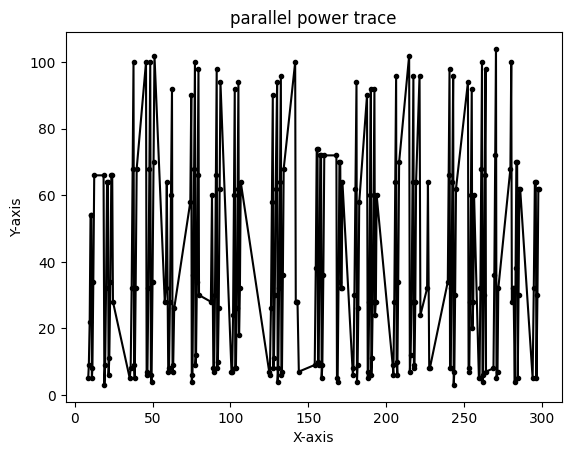

In [ ]:
def SR(inp):
	res = []
	for i in range(64):
		shft = (i // 4) % 4
		res.append(inp[(i - 16*shft) % 64])
	return res

def Mx16bit(b):
	c = [0 for i in range(16)]
	c[0] = (b[0] + b[12] + b[15] + b[3] + b[7] + b[8])%2
	c[1] = (b[0] + b[1] + b[12] + b[13] + b[4] + b[9])%2
	c[2] = (b[1] + b[10]+ b[13]+ b[14]+ b[2]+ b[5])%2
	c[3] = (b[11]+ b[14]+ b[2]+ b[6]+ b[7])%2
	c[4] = (b[0] + b[1]+ b[11]+ b[15]+ b[5])%2
	c[5] = (b[1]+ b[12]+ b[2]+ b[6]+ b[8])%2
	c[6] = (b[0] + b[13]+ b[2]+ b[3]+ b[4]+ b[7]+ b[9])%2
	c[7] = (b[0] + b[10]+ b[11]+ b[14]+ b[15]+ b[3]+ b[4])%2
	c[8] = (b[1]+ b[11]+ b[15]+ b[4]+ b[5]+ b[8])%2
	c[9] = (b[12]+ b[2]+ b[5]+ b[6]+ b[8]+ b[9])%2
	c[10] = (b[0] + b[10]+ b[13]+ b[3]+ b[4]+ b[6]+ b[7]+ b[9])%2
	c[11] = (b[0] + b[10]+ b[14]+ b[15]+ b[4]+ b[7])%2
	c[12] = (b[11]+ b[12]+ b[3]+ b[7]+ b[8])%2
	c[13] = (b[0] + b[13]+ b[4]+ b[8]+ b[9])%2
	c[14] = (b[1]+ b[10]+ b[14]+ b[5]+ b[9])%2
	c[15] = (b[10]+ b[15]+ b[2]+ b[3]+ b[6]+ b[7])%2
	return c

def Sbox16bit(inp):
	sb = [1,3,0,2,7,14,4,13,9,10,12,6,15,5,8,11]
	res = []
	for i in range(0,16,4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		v = sb[v]
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def in_bin(inp): # 0x45ba into [4,5,11,10]
	res = []
	for i in range(2,len(inp)):
		v = (int(inp[i],16))
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def lcs(inp):
	res = []
	key = inp[0]
	for i in range(1,len(inp)):
		res.append(inp[i])
	res.append(key)
	return res

def in_hex(inp):
	res = "0x"
	for i in range(0,len(inp),4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		res = res + hex(v)[2:]
	return res

import time
start_time = time.time() #start of the execution

#64-bit input registers
X =   in_bin("0x5353414d414e5441")
K0 =  in_bin("0x0519283201091364")
K1 =  in_bin("0x5029387763948871")
print(X)
print(K0)
print(K1)
############ ROUND CONSTANTS #######################
RC0 = in_bin("0x0000000000000000")#don't edit
RC1 = in_bin("0x1248248148128124")#don't edit
K = [K0,K1]
RC = [RC0,RC1]
####################################################
#power trace
pt = []

#round 0##################################################
##########################################################
b = [0,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

####################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

#########################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

##################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 0",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################################
#round 1########################################################
b = [0,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 2###########################################
b = [0,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 1",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)


tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 3###########################################
b = [0,0,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 2",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 4###########################################
b = [0,1,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 3",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 5###########################################
b = [0,1,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 4",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 6###########################################
b = [0,1,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 5",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 7###########################################
b = [0,1,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 6",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 8###########################################
b = [1,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 7",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 9###########################################
b = [1,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 8",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16]))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 10##########################################
b = [1,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 9",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
#c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
#c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 10",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
#############################
print(pt)
s = 0
t = pt[len(pt)-1][0]
print("time taken = ",t)
for i in range(len(pt)):
    s += pt[i][1]
print("switchings = ",s)
print(s/t)
#############################
#x0,(s1,m1,r1,x1),(s2,m2,r2,x2),(s3,m3,r3,x3),(s4,r4,x4)
#(x0,s0,m0,r0),(x1,s1,m1,r1),(x2,s2,m2,r2),(x3,s3,r3,x4)
########  PLOTTING  #########

import matplotlib.pyplot as plt

x = [point[0] for point in pt]
y = [point[1] for point in pt]

# Create a scatter plot
plt.plot(x, y, marker='.',color = 'black')

# Add title and labels
plt.title('parallel power trace')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[1, 3, 0, 2, 7, 14, 4, 13, 9, 10, 12, 6, 15, 5, 8, 11]
Round 0 0x67fe95d3188bbeb4 0x0519283201091364 0x5029387763948871 0x0000000000000000 0x1248248148128124
[0, 1, 2, 3, 8, 15, 14, 9, 7, 12, 10, 5, 13, 4, 6, 11]
Round 1 0x641081e45d02d14e 0xa325064021226c80 0x5029387763948871 0x0000000000000000 0x2481481281241248
[1, 3, 0, 2, 7, 15, 4, 10, 12, 5, 9, 6, 11, 8, 13, 14]
Round 2 0x836a098c1004913c 0xa325064021226c80 0x05270eec72910e2a 0x0000000000000000 0x4812812412482481
[0, 1, 2, 3, 10, 12, 13, 7, 14, 5, 8, 15, 9, 4, 6, 11]
Round 3 0xcead3eb8f8d9791f 0x64a0c804244d9014 0x05270eec72910e2a 0x0000000000000000 0x8124124824814812
[1, 3, 0, 2, 12, 15, 10, 4, 6, 11, 5, 8, 9, 7, 13, 14]
Round 4 0x3d0c0f808e732b1f 0x64a0c804244d9014 0xa4e1dd8e5221c540 0x0000000000000000 0x8124124824814812
[0, 1, 2, 3, 12, 

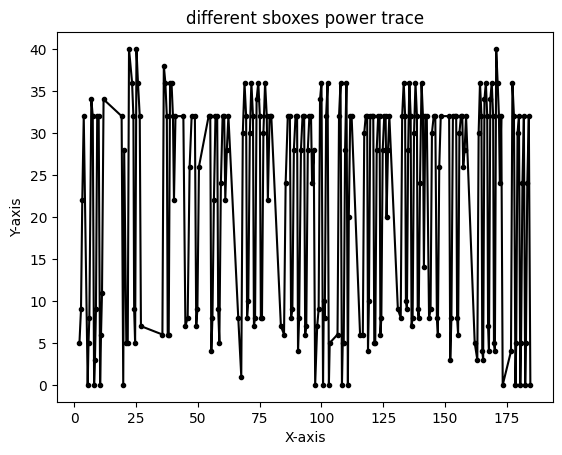

In [6]:
def SR(inp):
	res = []
	for i in range(64):
		shft = (i // 4) % 4
		res.append(inp[(i - 16*shft) % 64])
	return res

def Mx16bit(b):
	c = [0 for i in range(16)]
	c[0] = (b[0] + b[12] + b[15] + b[3] + b[7] + b[8])%2
	c[1] = (b[0] + b[1] + b[12] + b[13] + b[4] + b[9])%2
	c[2] = (b[1] + b[10]+ b[13]+ b[14]+ b[2]+ b[5])%2
	c[3] = (b[11]+ b[14]+ b[2]+ b[6]+ b[7])%2
	c[4] = (b[0] + b[1]+ b[11]+ b[15]+ b[5])%2
	c[5] = (b[1]+ b[12]+ b[2]+ b[6]+ b[8])%2
	c[6] = (b[0] + b[13]+ b[2]+ b[3]+ b[4]+ b[7]+ b[9])%2
	c[7] = (b[0] + b[10]+ b[11]+ b[14]+ b[15]+ b[3]+ b[4])%2
	c[8] = (b[1]+ b[11]+ b[15]+ b[4]+ b[5]+ b[8])%2
	c[9] = (b[12]+ b[2]+ b[5]+ b[6]+ b[8]+ b[9])%2
	c[10] = (b[0] + b[10]+ b[13]+ b[3]+ b[4]+ b[6]+ b[7]+ b[9])%2
	c[11] = (b[0] + b[10]+ b[14]+ b[15]+ b[4]+ b[7])%2
	c[12] = (b[11]+ b[12]+ b[3]+ b[7]+ b[8])%2
	c[13] = (b[0] + b[13]+ b[4]+ b[8]+ b[9])%2
	c[14] = (b[1]+ b[10]+ b[14]+ b[5]+ b[9])%2
	c[15] = (b[10]+ b[15]+ b[2]+ b[3]+ b[6]+ b[7])%2
	return c

def Sbox16bit(inp,sb):
	#sb = [1,3,0,2,7,14,4,13,9,10,12,6,15,5,8,11]
	#sb is the mapping
	res = []
	for i in range(0,16,4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		v = sb[v]
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def genMapping(sb,p1,p2):#generate Sbox mapping
	seq = [0 for i in range(16)]
	c = 0
	for i in sb:
		seq[i] = c
		c += 1
	res = []

	for i in p1:
		for j in p2:
			res.append(seq[4*i+j])
	return res

def in_bin(inp): # 0x45ba into [4,5,11,10]
	res = []
	for i in range(2,len(inp)):
		v = (int(inp[i],16))
		bn = []
		bt = 4
		while(v or bt):
			bn.append(v%2)
			v = v // 2
			bt -= 1
		bn.reverse()
		for k in range(len(bn)):
			res.append(bn[k])
	return res

def lcs(inp):
	res = []
	key = inp[0]
	for i in range(1,len(inp)):
		res.append(inp[i])
	res.append(key)
	return res

def in_hex(inp):
	res = "0x"
	for i in range(0,len(inp),4):
		v = 8*inp[i]+4*inp[i+1]+2*inp[i+2]+inp[i+3]
		res = res + hex(v)[2:]
	return res

import time
start_time = time.time() #start of the execution

#64-bit input registers
X =   in_bin("0x5353414d414e5441")
K0 =  in_bin("0x0519283201091364")
K1 =  in_bin("0x5029387763948871")
print(X)
############ Sbox Mappings #########################
sb = [1,3,0,2,7,14,4,13,9,10,12,6,15,5,8,11]
############ ROUND CONSTANTS #######################
RC0 = in_bin("0x0000000000000000")#don't edit
RC1 = in_bin("0x1248248148128124")#don't edit
K = [K0,K1]
#assigning permutations from secret key
decValKey_p1 = 4*K[0][0]+2*K[0][1]+K[0][2];
decValKey_p2 = 2*K[1][0]+K[1][1];
if decValKey_p1 == 0:
	p1 = [0,2,3,1]
elif decValKey_p1 == 1:
	p1 = [0,3,1,2]
elif decValKey_p1 == 2:
	p1 = [1,2,0,3]
elif decValKey_p1 == 3:
	p1 = [1,3,2,0]
elif decValKey_p1 == 4:
	p1 = [2,0,1,3]
elif decValKey_p1 == 5:
	p1 = [2,1,3,0]
elif decValKey_p1 == 6:
	p1 = [3,0,2,1]
else:
	p2 = [3,1,0,2]

if decValKey_p2 == 0:
	p2 = [1,2,3,0]
elif decValKey_p2 == 1:
	p2 = [1,3,0,2]
elif decValKey_p2 == 2:
	p2 = [2,0,3,1]
elif decValKey_p2 == 3:
	p2 = [2,3,1,0]
elif decValKey_p2 == 4:
	p2 = [3,0,1,2]
elif decValKey_p2 == 5:
	p2 = [3,2,0,1]
elif decValKey_p2 == 6:
	p2 = [3,0,1,2]
else:
	p2 = [3,2,0,1]
# ends here
RC = [RC0,RC1]
####################################################
#power trace
pt = []
#round 0##################################################
##########################################################
b = [0,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

####################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

#########################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

##################################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 0",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################################
#round 1########################################################
b = [0,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 2###########################################
b = [0,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 1",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 3###########################################
b = [0,0,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 2",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 4###########################################
b = [0,1,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 3",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 5###########################################
b = [0,1,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 4",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 6###########################################
b = [0,1,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 5",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 7###########################################
b = [0,1,1,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 6",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 8###########################################
b = [1,0,0,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 7",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = Mx16bit(Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 9###########################################
b = [1,0,0,1]
u = (b[0]^b[2])|(b[1]^b[3])

tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 8",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
sb = genMapping(sb,p1,p2);print(sb)
tmp = (Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = (Sbox16bit(X[0:16],sb))   #sm

c = 0
for j in range(16):
	if X[j] != tmp[j]:
		c += 1
X[0:16] = tmp

ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = SR(X)              #SR
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
X = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

###################################################
#round 10##########################################
b = [1,0,1,0]
u = (b[0]^b[2])|(b[1]^b[3])
tmp = K[b[3]]
for j in range(5):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 9",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#####################################################

c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#######################################################
c = 0
for j in range(16):
	tmp = (X[j] + K[b[3]][j] + RC[u][j])%2 #ark
	if X[j] != tmp:
		c += 1
	X[j] = tmp
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = X
for j in range(16):     #shX
	X = lcs(X)
c = 0
for j in range(64):
	if X[j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = K[b[3]]
for j in range(16):     #shK
	K[b[3]] = lcs(K[b[3]])
c = 0
for j in range(64):
	if K[b[3]][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)

tmp = RC[u]
for j in range(16):     #shRC
	RC[u] = lcs(RC[u])
c = 0
for j in range(64):
	if RC[u][j] != tmp[j]:
		c += 1
ptrow = [(time.time() - start_time)*1000,c,8*b[0]+4*b[1]+2*b[2]+b[3]]
pt.append(ptrow)
#################################
print("Round 10",in_hex(X),in_hex(K[0]),in_hex(K[1]),in_hex(RC[0]),in_hex(RC[1]))
#################################
#############################
print(pt)
s = 0
t = pt[len(pt)-1][0]
print("time taken = ",t)
for i in range(len(pt)):
    s += pt[i][1]
print("switchings = ",s)
print(s/t)
#############################
#x0,(s1,m1,r1,x1),(s2,m2,r2,x2),(s3,m3,r3,x3),(s4,r4,x4)
#(x0,s0,m0,r0),(x1,s1,m1,r1),(x2,s2,m2,r2),(x3,s3,r3,x4)
########  PLOTTING  #########

import matplotlib.pyplot as plt

x = [point[0] for point in pt]
y = [point[1] for point in pt]
# Create a scatter plot
plt.plot(x, y, marker='.',color = 'black')

# Add title and labels
plt.title('different sboxes power trace')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()
